# Round 2

In [1]:
import pandas as pd

# Get Data

In [2]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'files_for_lab/csv_files/marketing_customer_analysis.csv'

In [ ]:
data.head()

# Show DataFrame Shape

In [ ]:
data.shape

# Standardize column names

In [ ]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

print(data.columns)

# Find numerical and categorical columns

In [ ]:
data.dtypes

In [ ]:
data.select_dtypes(np.number)

In [ ]:
data.select_dtypes(object)

# Locating and dealing with NaN values

In [ ]:
data.isna().sum()

In [ ]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column

In [ ]:
data['vehicle_type'].value_counts(dropna=False)

In [ ]:
data['vehicle_type']=data['vehicle_type'].fillna('Not A')             # I made a decision that this column was either
data['vehicle_type'].value_counts(dropna=False)                # A or NOT A  So I filled accordingly

In [ ]:
data=data.drop(columns=['unnamed:_0'])  # drop a column  
data=data.dropna()   # drop rows with nan values
data.isna().sum()

# Datetime column

In [ ]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])

In [ ]:
data.dtypes

In [3]:
data['month'] = data['effective_to_date'].dt.month
data

NameError: name 'data' is not defined

# BONUS create a function to clean dataframe

In [16]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [17]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0','vehicle_type'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['month'] = df['effective_to_date'].dt.month
    return df

In [18]:
data2 = clean_data(data)

In [19]:
data2                    #would have to change 'employmentstatus' independently

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


# Round 3

## Continuing with data2 - cleaned dataframe

### describe the data

In [20]:
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [22]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status  

## Import necessary libraries

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Plot total number of responses

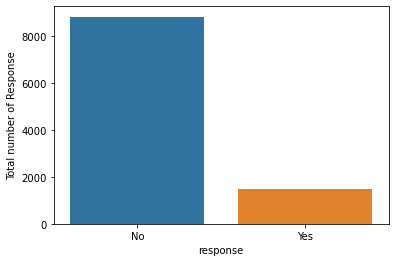

In [25]:
sns.countplot('response', data=data)
plt.ylabel('Total number of Response')
plt.show()

## Plot response rate by Sales Channel

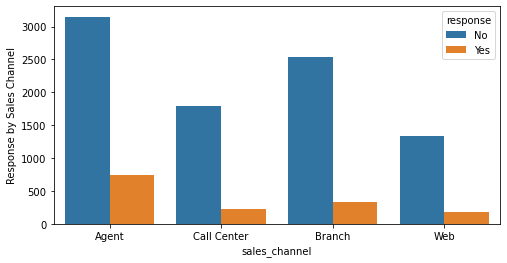

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x='sales_channel', hue='response', data=data)
#sns.countplot('response', hue='sales_channel', data=data)
plt.ylabel('Response by Sales Channel')
plt.show()

### This is a count of responses by channel, not the rate.
### I still need to create a rate column

In [31]:
data2['response_rate'] = np.where(data2.response=='Yes',1,0)

<IPython.core.display.Javascript object>

In [32]:
data2.response_rate.value_counts()

0    7826
1    1308
Name: response_rate, dtype: int64

### Use a groupby to create the rate

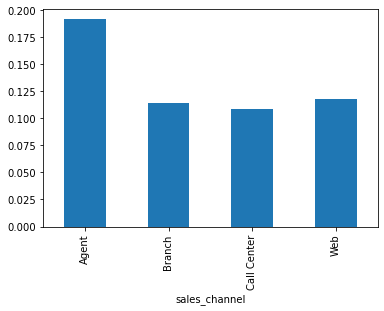

In [33]:
# found this code at https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

data2.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

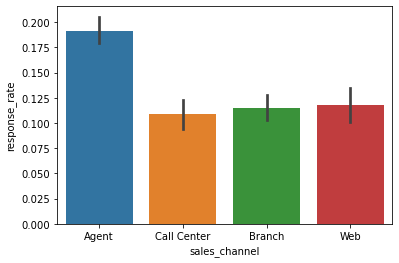

In [35]:
sns.barplot(x= 'sales_channel',y='response_rate',data=data2)

### Response rate by Total Claim Amount

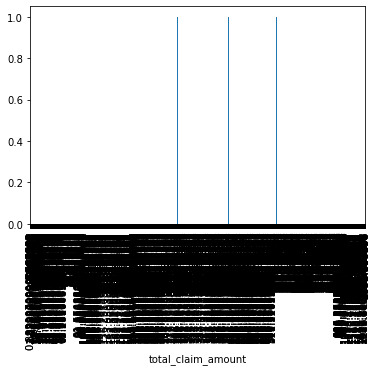

In [34]:
data2.groupby('total_claim_amount')['response_rate'].mean().plot.bar()
plt.show()

### Yuck.  Left this in so you could see the process.  Not a helpful graph!!

### I need to bin the total claim amounts -- too many unique values

In [36]:
print('Maximum value',data2['total_claim_amount'].max())
print('Minimum value',data2['total_claim_amount'].min())
print('Mean value',data2['total_claim_amount'].mean())

Maximum value 2893.239678
Minimum value 0.09900700000000001
Mean value 434.08879431289563


### Function to bin into categories

In [37]:
def tca_bins(x):
    if x <=450:
        return 1
    elif x<=900:
        return 2
    elif x<=1350:
        return 3
    elif x<=1800:
        return 4
    else:
        return 5
    
data2['total_claim_amount_bins'] = list(map(tca_bins, data2['total_claim_amount']))

data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,response_rate,total_claim_amount_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0,1
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1,2
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1,0,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2,0,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1,0,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2,0,1


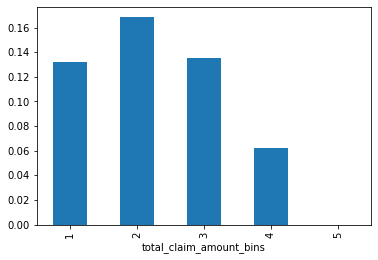

In [38]:
data2.groupby('total_claim_amount_bins')['response_rate'].mean().plot.bar()
plt.show()

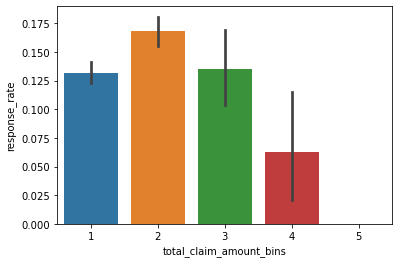

In [39]:
sns.barplot(x= 'total_claim_amount_bins',y='response_rate',data=data2)

### Changing x-tick labels.  First have to use plt.subplots to create plot environment.  Shift/Tab is useful here.

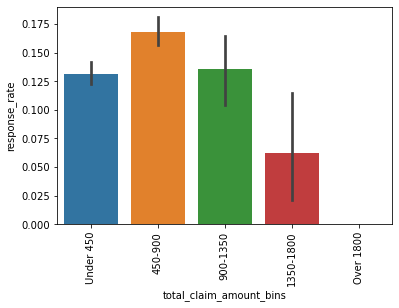

In [40]:
fig, ax = plt.subplots()
sns.barplot(x= 'total_claim_amount_bins',y='response_rate',data=data2)

labels=['Under 450','450-900','900-1350','1350-1800','Over 1800']

# read the documentation for correct syntax
ax.set_xticklabels(x='total_claim_amount_bins',labels=labels,rotation='vertical')
plt.show()

### Same binning issue as total claim amount

In [41]:
print('Maximum value',data2['income'].max())
print('Minimum value',data2['income'].min())
print('Mean value',data2['income'].mean())

Maximum value 99981
Minimum value 0
Mean value 37657.38000875848


In [42]:
def income_bins(x):
    if x <20000:
        return 1
    elif x<40000:
        return 2
    elif x<60000:
        return 3
    elif x<80000:
        return 4
    else:
        return 5
    
data2['income_bins'] = list(map(income_bins, data2['income']))

data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,response_rate,total_claim_amount_bins,income_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0,1,3
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0,2,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0,2,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1,2,3
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1,0,1,3
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2,0,2,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1,0,1,4
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2,0,1,2


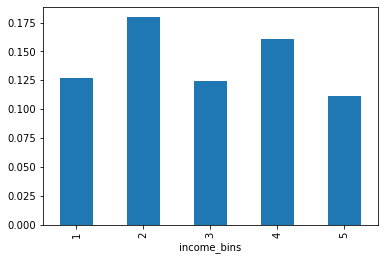

In [43]:
data2.groupby('income_bins')['response_rate'].mean().plot.bar()
plt.show()

### Changing x-tick labels

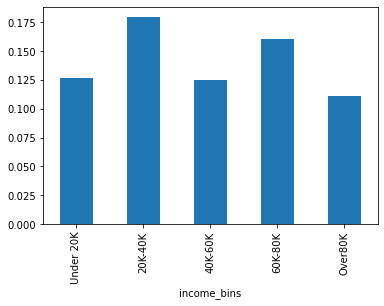

In [44]:
fig, ax = plt.subplots()
data2.groupby('income_bins')['response_rate'].mean().plot.bar()

labels=['Under 20K','20K-40K','40K-60K','60K-80K','Over80K']

# read the documentation for correct syntax
ax.set_xticklabels(x='income_bins',labels=labels,rotation='vertical')
plt.show()